# 리뷰에서 불만의 원인

In [184]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)


In [185]:
origin_reviews_path = r"../../downloads/olist/olist_order_reviews_dataset.csv"
origin_order_items_dataset_path = r"../../downloads/olist/olist_order_items_dataset.csv"

eng_reviews_title_path = r"../../artifact/reviews_with_senti/eng_kor_title_with_senti.csv"
eng_reviews_message_path = r"../../artifact/reviews_with_senti/eng_kor_message_with_senti.csv"


for path in [
    origin_reviews_path,
    origin_order_items_dataset_path,
    eng_reviews_title_path,
    eng_reviews_message_path]:
    print(os.path.exists(path))

True
True
True
True


In [186]:
origin_reviews_df = pd.read_csv(origin_reviews_path)
origin_order_items_dataset_df = pd.read_csv(origin_order_items_dataset_path)


# join eng review

In [187]:
origin_reviews_title_df = origin_reviews_df[['review_id', 'review_score', 'review_comment_title']]
origin_reviews_title_df = origin_reviews_title_df[origin_reviews_title_df['review_comment_title'].notna()]
origin_reviews_title_df.drop_duplicates(inplace=True)
origin_reviews_title_df.shape

eng_kor_reviews_title_df = pd.read_csv(eng_reviews_title_path)
eng_kor_reviews_title_df.shape

# 아이디 개수가 안맞아서 확인해보니 리뷰 제목이 전처리로 인해 제거될 것들임
diff_review_ids = set(origin_reviews_title_df.review_id) - set(eng_kor_reviews_title_df.review_id)
diff_review_ids_df = origin_reviews_title_df[origin_reviews_title_df.review_id.isin(diff_review_ids)]

# diff_review_ids_df.review_comment_title.to_csv('check.csv')
eng_titile_score_df = pd.merge(eng_kor_reviews_title_df, origin_reviews_title_df, on='review_id', how='left')
eng_titile_score_df.drop(columns=['preprocessed', 'review_comment_title', 'e2k'], inplace=True)
eng_titile_score_df

,review_id,negative,neutral,positive,max_sentimental,p2e,review_score
0,8670d52e15e00043ae7de4c01cc2fe06,0.000477,0.001488,0.998036,positive,I recommend,4
1,3948b09f7c818e2d86c9a546758b2335,0.000188,0.000258,0.999554,positive,I highly recommend,5
2,373cbeecea8286a2b66c97b1b157ec46,0.999020,0.000736,0.000244,negative,my product has not arrived,1
3,d21bbc789670eab777d27372ab9094cc,0.000173,0.000228,0.999599,positive,Great,5
4,c92cdd7dd544a01aa35137f901669cdf,0.000172,0.000203,0.999624,positive,very good.,4
...,...,...,...,...,...,...,...
11435,0e7bc73fde6782891898ea71443f9904,0.000238,0.999219,0.000542,neutral,?,4
11436,58be140ccdc12e8908ff7fd2ba5c7cb0,0.000157,0.000192,0.999651,positive,very good product,5
11437,51de4e06a6b701cb2be47ea0e689437b,0.999156,0.000632,0.000213,negative,the request was not delivered,3
11438,40743b46a0ee86375cedb95e82b78d75,0.000198,0.000214,0.999588,positive,Great packaging,5


# join seller

In [188]:
origin_reviews_df.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [189]:
origin_order_items_dataset_df.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [190]:
order_by_seller = pd.merge(origin_reviews_df[['review_id', 'order_id']], origin_order_items_dataset_df[['order_id', 'seller_id']], on='order_id')
order_by_seller.drop_duplicates(inplace=True)

In [191]:
order_by_seller

,review_id,order_id,seller_id
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,6d803cb79cc31c41c4c789a75933b3c7
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,8e6d7754bc7e0f22c96d255ebda59eba
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,a1043bafd471dff536d0c462352beb48
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,a1043bafd471dff536d0c462352beb48
5,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,989becdce12ebc39863c2bceab6f3ca1
...,...,...,...
112367,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5343d0649eca2a983820bfe93fc4d17e
112368,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,46dc3b2cc0980fb8ec44634e21d2718e
112369,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,17ca9b9e9b9ef8fdb529001b49ebb50f
112370,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,8d956fec2e4337affcb520f56fd8cbfd


# top seller의 리뷰 확인 

In [192]:
review_count_by_seller = order_by_seller.groupby('seller_id')['review_id'].count().sort_values(ascending=False)

In [193]:
review_count_by_seller.shape

(3090,)

In [194]:
top_seller_id = review_count_by_seller.index[0]
top_seller_id

'6560211a19b47992c3666cc44a7e94c0'

In [195]:
top_seller_order_ids = order_by_seller[order_by_seller.seller_id == top_seller_id]['order_id']
top_seller_order_ids.shape

(1844,)

In [196]:
top_seller_reviews = origin_reviews_df[origin_reviews_df.order_id.isin(top_seller_order_ids)]
# top_seller_reviews

In [197]:
score_counts = top_seller_reviews['review_score'].value_counts().sort_index(ascending=False)
score_counts

review_score
5    948
4    381
3    196
2     89
1    230
Name: count, dtype: int64

In [198]:
print("top seller의 점수 분포 비율:")
print((score_counts / score_counts.sum() * 100).round(2))

top seller의 점수 분포 비율:
review_score
5    51.41
4    20.66
3    10.63
2     4.83
1    12.47
Name: count, dtype: float64


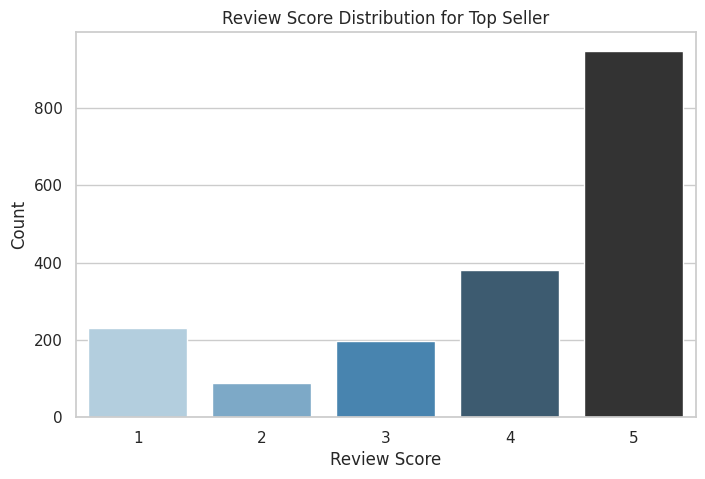

In [199]:
score_df = score_counts.reset_index()
score_df.columns = ['review_score', 'count']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))

# hue를 x로 지정하고, legend는 끔
sns.barplot(
    data=score_df,
    x='review_score',
    y='count',
    hue='review_score',     # 👈 hue 추가
    palette='Blues_d',
    legend=False             # 👈 범례는 끔
)

plt.title("Review Score Distribution for Top Seller")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()


# 리뷰 점수 1점의 원인 분석

In [200]:
eng_reviews_title = pd.read_csv(eng_reviews_title_path)
eng_reviews_message = pd.read_csv(eng_reviews_message_path)

In [201]:
lowest_score_review = top_seller_reviews[top_seller_reviews.review_score == 1][['review_id', 'review_score', 'review_comment_title', 'review_comment_message']]
# lowest_score_review

In [202]:
lowest_score_title = lowest_score_review[~lowest_score_review.review_comment_title.isnull()]
lowest_score_title_eng = pd.merge(
    lowest_score_title[['review_id']],
    eng_reviews_title[['review_id', "p2e"]],
    on='review_id'
    )
lowest_score_title_eng.shape

(64, 2)

In [203]:
lowest_score_message = lowest_score_review[~lowest_score_review.review_comment_message.isnull()]
lowest_score_message_eng = pd.merge(
    lowest_score_title[['review_id']],
    eng_reviews_message[['review_id', "p2e"]],
    on='review_id'
    )
lowest_score_message_eng.shape

(59, 2)

In [204]:
lowest_score_eng = pd.concat([lowest_score_title_eng, lowest_score_message_eng])
lowest_score_eng.drop_duplicates(inplace=True)
# lowest_score_eng

In [205]:
# !pip install wordcloud
# !pip install nltk

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jmhwang/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jmhwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jmhwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jmhwang/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


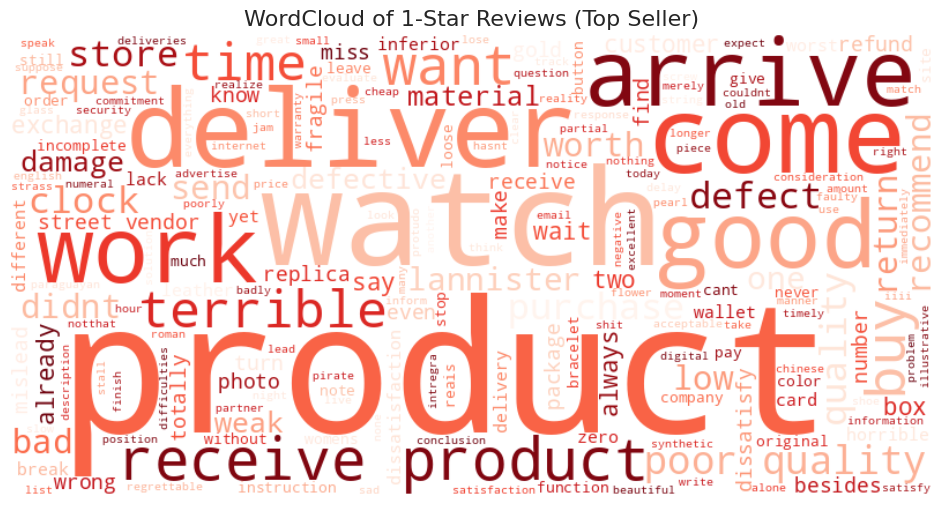

In [206]:
# Import libraries
import re
import sys
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# # Setup NLTK data path (if needed)
# nltk.data.path.append('/home/jmhwang/nltk_data')
# sys.path.append("/home/jmhwang/nltk_data")

# Initialize components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define functions
def lemmatize_tokens(tokens):
    """Apply lemmatization to tokens"""
    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]

def preprocess(text):
    """Preprocess text: lowercase, remove non-alphabetic chars, tokenize, remove stopwords, lemmatize"""
    if not isinstance(text, str):
        return ''
    
    # Convert to lowercase and remove non-alphabetic characters
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and short words
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    
    # Lemmatize
    tokens = lemmatize_tokens(tokens)
    
    return ' '.join(tokens)

# Process text data
text_corpus = lowest_score_eng['p2e'].dropna().apply(preprocess).str.cat(sep=' ')

# Generate word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='Reds'
).generate(text_corpus)

# Visualize
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of 1-Star Reviews (Top Seller)", fontsize=16)
plt.show()

In [207]:
from collections import Counter

# 모든 토큰 모으기
tokens = text_corpus.split()

# 빈도 계산
word_freq = Counter(tokens)
len(word_freq)

251

In [208]:
# 상위 20개 키워드 추출
top_words = word_freq.most_common(20)
words, freqs = zip(*top_words)


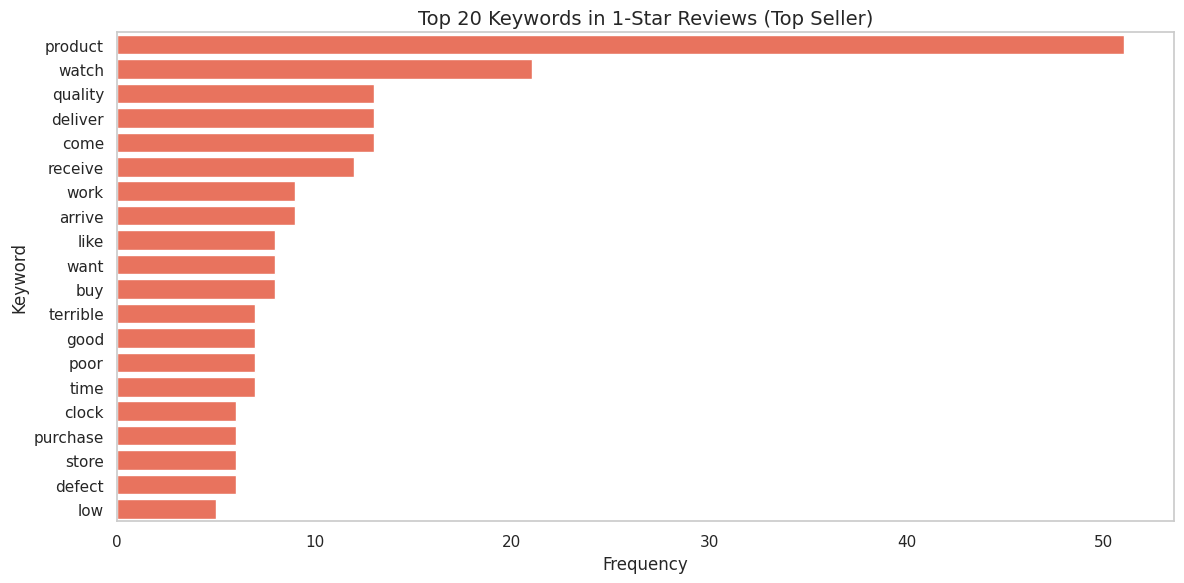

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=list(freqs), y=list(words), color='tomato')  # 수평 막대
plt.title("Top 20 Keywords in 1-Star Reviews (Top Seller)", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.grid(axis='x')
plt.tight_layout()
plt.show()
